In [51]:
#LinearRegression is a machine learning library for linear regression 
from sklearn.linear_model import LinearRegression 

# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 

#matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn 

#yahoo_finance is used to fetch data 
import yahoo_finance as yf
from pandas_datareader import data as pdr

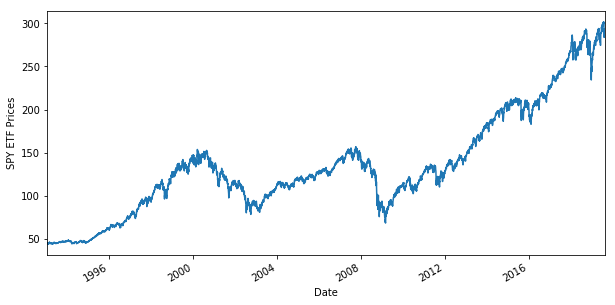

In [52]:
df = pdr.get_data_yahoo('SPY', '06-04-1987', '08-23-2019')
df = df.dropna()
df.head()
df=df[['Close']]
df.Close.plot(figsize=(10,5))
plt.ylabel("SPY ETF Prices")
plt.show()



In [53]:
df['S_3'] = df['Close'].shift(1).rolling(window=10).mean() 

df['S_9']= df['Close'].shift(1).rolling(window=50).mean() 

df= df.dropna() 

X = df[['S_3','S_9']] 

X.head()

,S_3,S_9
Date,,
1993-04-13,44.665625,44.687500
1993-04-14,44.656250,44.708750
1993-04-15,44.628125,44.722500
1993-04-16,44.603125,44.734375
1993-04-19,44.593750,44.736875


In [54]:
y = df['Close']
y.head()

Date
1993-04-13    45.0000
1993-04-14    44.9375
1993-04-15    44.9375
1993-04-16    44.9375
1993-04-19    44.7500
Name: Close, dtype: float64

In [55]:
t=.8 
t = int(t*len(df)) 

# Train dataset 
X_train = X[:t] 
y_train = y[:t]  

# Test dataset 
X_test = X[t:]
y_test = y[t:]

In [56]:
linear = LinearRegression().fit(X_train,y_train) 

print ((("SPY ETF Price =",round(linear.coef_[0],2),

"* 10 Days Moving Average", round(linear.coef_[1],2), 

"* 50 Days Moving Average +", round(linear.intercept_,2))))

('SPY ETF Price =', 1.11, '* 10 Days Moving Average', -0.12, '* 50 Days Moving Average +', 0.29)


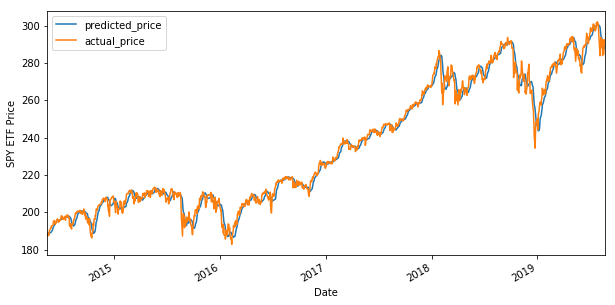

In [57]:
predicted_price = linear.predict(X_test)  

predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  

predicted_price.plot(figsize=(10,5))  

y_test.plot()  

plt.legend(['predicted_price','actual_price'])  

plt.ylabel("SPY ETF Price")  

plt.show()

In [58]:
r2_score = linear.score(X[t:],y[t:])*100  

float("{0:.2f}".format(r2_score))

98.79